In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import folium

In [2]:
X_train=pd.read_csv('X_train.csv', index_col=0)

In [3]:
X_train.head()

,time,seconds_elapsed_orientation,qz_orientation,qy_orientation,qx_orientation,qw_orientation,roll_orientation,pitch_orientation,yaw_orientation,seconds_elapsed_location,...,horizontalAccuracy_location_network,speed_location_network,bearing_location_network,altitude_location_network,longitude_location_network,latitude_location_network,seconds_elapsed_gravity,z_gravity,y_gravity,x_gravity
297761,1694674073921045500,53.358045,-0.006688,-0.856364,-0.098919,0.506766,-2.080841,0.088920,0.177835,52.752000,...,82.487999,0.0,0.0,91.700005,3.117116,50.688061,53.358045,-4.750511,-0.893249,8.532593
2435225,1694888909527796200,829.472796,-0.579941,0.701075,-0.299642,0.287014,2.816012,1.398345,-0.533328,829.041995,...,13.990000,0.0,0.0,89.599998,3.152556,50.681629,829.472796,-1.616572,-9.657412,-0.539898
2298782,1694888605391092700,525.336093,0.090644,-0.330972,-0.728352,0.593081,-2.392310,1.178267,1.774612,525.192492,...,16.742001,0.0,0.0,88.800003,3.149228,50.684096,525.336093,-2.793045,-9.047670,2.551264
636536,1694681110670679000,445.343355,0.301066,-0.303247,0.891667,0.149434,-2.460359,-0.083994,-2.456169,444.988000,...,15.684000,0.0,0.0,68.599998,3.095503,50.688231,445.343355,-7.590456,0.822111,6.154631
24209,1694672605553326000,54.098936,0.263973,-0.545729,-0.661544,0.441427,-2.867242,1.059605,1.600733,53.868000,...,15.861000,0.0,0.0,84.200005,3.137801,50.683183,54.098936,-4.625523,-8.545597,1.322021


In [4]:
X_train.columns

Index(['time', 'seconds_elapsed_orientation', 'qz_orientation',
       'qy_orientation', 'qx_orientation', 'qw_orientation',
       'roll_orientation', 'pitch_orientation', 'yaw_orientation',
       'seconds_elapsed_location', 'bearingAccuracy_location',
       'speedAccuracy_location', 'verticalAccuracy_location',
       'horizontalAccuracy_location', 'speed_location', 'bearing_location',
       'altitude_location', 'longitude_location', 'latitude_location',
       'seconds_elapsed_total_acceleration', 'z_total_acceleration',
       'y_total_acceleration', 'x_total_acceleration',
       'seconds_elapsed_magnetometer', 'z_magnetometer', 'y_magnetometer',
       'x_magnetometer', 'seconds_elapsed_accelerometer', 'z_accelerometer',
       'y_accelerometer', 'x_accelerometer', 'seconds_elapsed_location_gps',
       'bearingAccuracy_location_gps', 'speedAccuracy_location_gps',
       'verticalAccuracy_location_gps', 'horizontalAccuracy_location_gps',
       'speed_location_gps', 'bearing_l

# Data interpretation
### Time
- **time**: Time when the data was collected.

### Orientation
- **seconds_elapsed_orientation**: Time elapsed since the orientation measurement started.
- **qz_orientation, qy_orientation, qx_orientation, qw_orientation**: Components of the quaternion representing the device's orientation in 3D space.
- **roll_orientation, pitch_orientation, yaw_orientation**: Angles representing the roll, pitch, and yaw of the device.

### Location
- **seconds_elapsed_location**: Time elapsed since the location measurement started.
- **bearingAccuracy_location**: Accuracy of bearing measurement.
- **speedAccuracy_location**: Accuracy of speed measurement.
- **verticalAccuracy_location, horizontalAccuracy_location**: Accuracy of vertical and horizontal location measurement.
- **speed_location**: Speed of the device's movement.
- **bearing_location**: Direction of device movement.
- **altitude_location**: Altitude above sea level.
- **longitude_location, latitude_location**: Geographic coordinates.

### Total Acceleration
- **seconds_elapsed_total_acceleration**: Duration of total acceleration measurement.
- **z_total_acceleration, y_total_acceleration, x_total_acceleration**: Components of the total acceleration in the XYZ axes.

### Magnetometer
- **seconds_elapsed_magnetometer**: Duration of magnetometer measurement.
- **z_magnetometer, y_magnetometer, x_magnetometer**: Components of the magnetic field in the XYZ axes.

### Gyroscope
- **seconds_elapsed_gyroscope**: Duration of gyroscope measurement.
- **z_gyroscope, y_gyroscope, x_gyroscope**: Components of angular velocity in the XYZ axes.

### Pedometer
- **seconds_elapsed_pedometer**: Duration of pedometer measurement.
- **steps_pedometer**: Number of steps taken by the user.

### GPS Location
- **seconds_elapsed_location_gps**: Duration of GPS location measurement.
- **bearingAccuracy_location_gps, speedAccuracy_location_gps, verticalAccuracy_location_gps, horizontalAccuracy_location_gps**: Accuracy parameters of GPS location measurement.
- **speed_location_gps, bearing_location_gps, altitude_location_gps, longitude_location_gps, latitude_location_gps**: GPS location parameters.

### Network Location
- **seconds_elapsed_location_network**: Duration of network location measurement.
- **bearingAccuracy_location_network, speedAccuracy_location_network, verticalAccuracy_location_network, horizontalAccuracy_location_network**: Accuracy parameters of network location measurement.
- **speed_location_network, bearing_location_network, altitude_location_network, longitude_location_network, latitude_location_network**: Network location parameters.

### Gravity
- **seconds_elapsed_gravity**: Duration of gravity measurement.
- **z_gravity, y_gravity, x_gravity**: Components of the gravitational vector in the XYZ axes.


## Stats and distributions

In [6]:
summary_stats = X_train.describe(include='all')
summary_stats

,time,seconds_elapsed_orientation,qz_orientation,qy_orientation,qx_orientation,qw_orientation,roll_orientation,pitch_orientation,yaw_orientation,seconds_elapsed_location,...,horizontalAccuracy_location_network,speed_location_network,bearing_location_network,altitude_location_network,longitude_location_network,latitude_location_network,seconds_elapsed_gravity,z_gravity,y_gravity,x_gravity
count,9.450410e+05,945041.000000,945041.000000,945041.000000,945041.000000,9.450410e+05,945041.000000,945041.000000,945041.000000,945041.000000,...,945041.000000,945041.0,945041.0,945041.000000,945041.000000,945041.000000,945041.000000,945041.000000,945041.000000,945041.000000
mean,1.695278e+18,412.397062,0.082867,-0.250551,-0.118097,3.174870e-01,-1.729286,0.627828,-0.485161,412.950257,...,199.519400,0.0,0.0,62.176667,3.117940,50.683220,412.397062,-4.101374,-5.016754,4.094318
std,1.065255e+15,329.661656,0.368959,0.501054,0.617410,2.173313e-01,1.601522,0.514444,1.758028,329.560286,...,305.683719,0.0,0.0,31.173666,0.020242,0.005086,329.661656,3.182244,3.783212,3.602575
min,1.694673e+18,0.075839,-0.999268,-0.998568,-0.998610,2.653055e-07,-3.141592,-1.267892,-3.141487,0.135000,...,11.505000,0.0,0.0,0.000000,3.091028,50.672179,0.075839,-9.806552,-9.806650,-7.136901
25%,1.694683e+18,151.921550,-0.239142,-0.657264,-0.654548,1.454073e-01,-2.716038,0.169106,-2.312639,152.810000,...,17.021000,0.0,0.0,66.500000,3.097713,50.681150,151.921550,-7.518442,-8.767777,0.814959
50%,1.694857e+18,318.096767,0.209346,-0.331700,-0.366073,2.849147e-01,-2.438557,0.586162,-0.575161,318.238000,...,43.678001,0.0,0.0,68.599998,3.118797,50.684121,318.096767,-3.704986,-5.419424,3.694620
75%,1.694889e+18,601.210410,0.330877,-0.006983,0.437474,5.032149e-01,-1.743663,1.106841,0.941651,602.170608,...,149.600006,0.0,0.0,85.599998,3.137739,50.688061,601.210410,-1.817515,-1.643841,7.798363
max,1.697621e+18,1311.321347,0.999243,0.999152,0.998339,9.918599e-01,3.141589,1.570451,3.141579,1310.867848,...,1899.999023,0.0,0.0,96.700005,3.152565,50.692578,1311.321347,9.805528,9.348486,9.800911


In [8]:
selected_columns = ['qz_orientation', 'z_total_acceleration', 'z_gravity', 'z_magnetometer', 'z_accelerometer', 'z_gyroscope']
summary_table = summary_stats.loc[:, selected_columns]
print(summary_table)

       qz_orientation  z_total_acceleration      z_gravity  z_magnetometer  \
count   945041.000000         945041.000000  945041.000000   945041.000000   
mean         0.082867             -4.016707      -4.101374       18.196407   
std          0.368959              3.639738       3.182244       15.516452   
min         -0.999268            -55.123055      -9.806552      -53.756252   
25%         -0.239142             -7.452000      -7.518442        7.968750   
50%          0.209346             -3.679950      -3.704986       23.175001   
75%          0.330877             -1.642050      -1.817515       28.800001   
max          0.999243             38.827953       9.805528      161.943756   

       z_accelerometer    z_gyroscope  
count    945041.000000  945041.000000  
mean          0.084677      -0.012906  
std           2.467785       0.727884  
min         -50.805279      -9.883363  
25%          -0.519501      -0.344438  
50%           0.059807      -0.000825  
75%           0.5

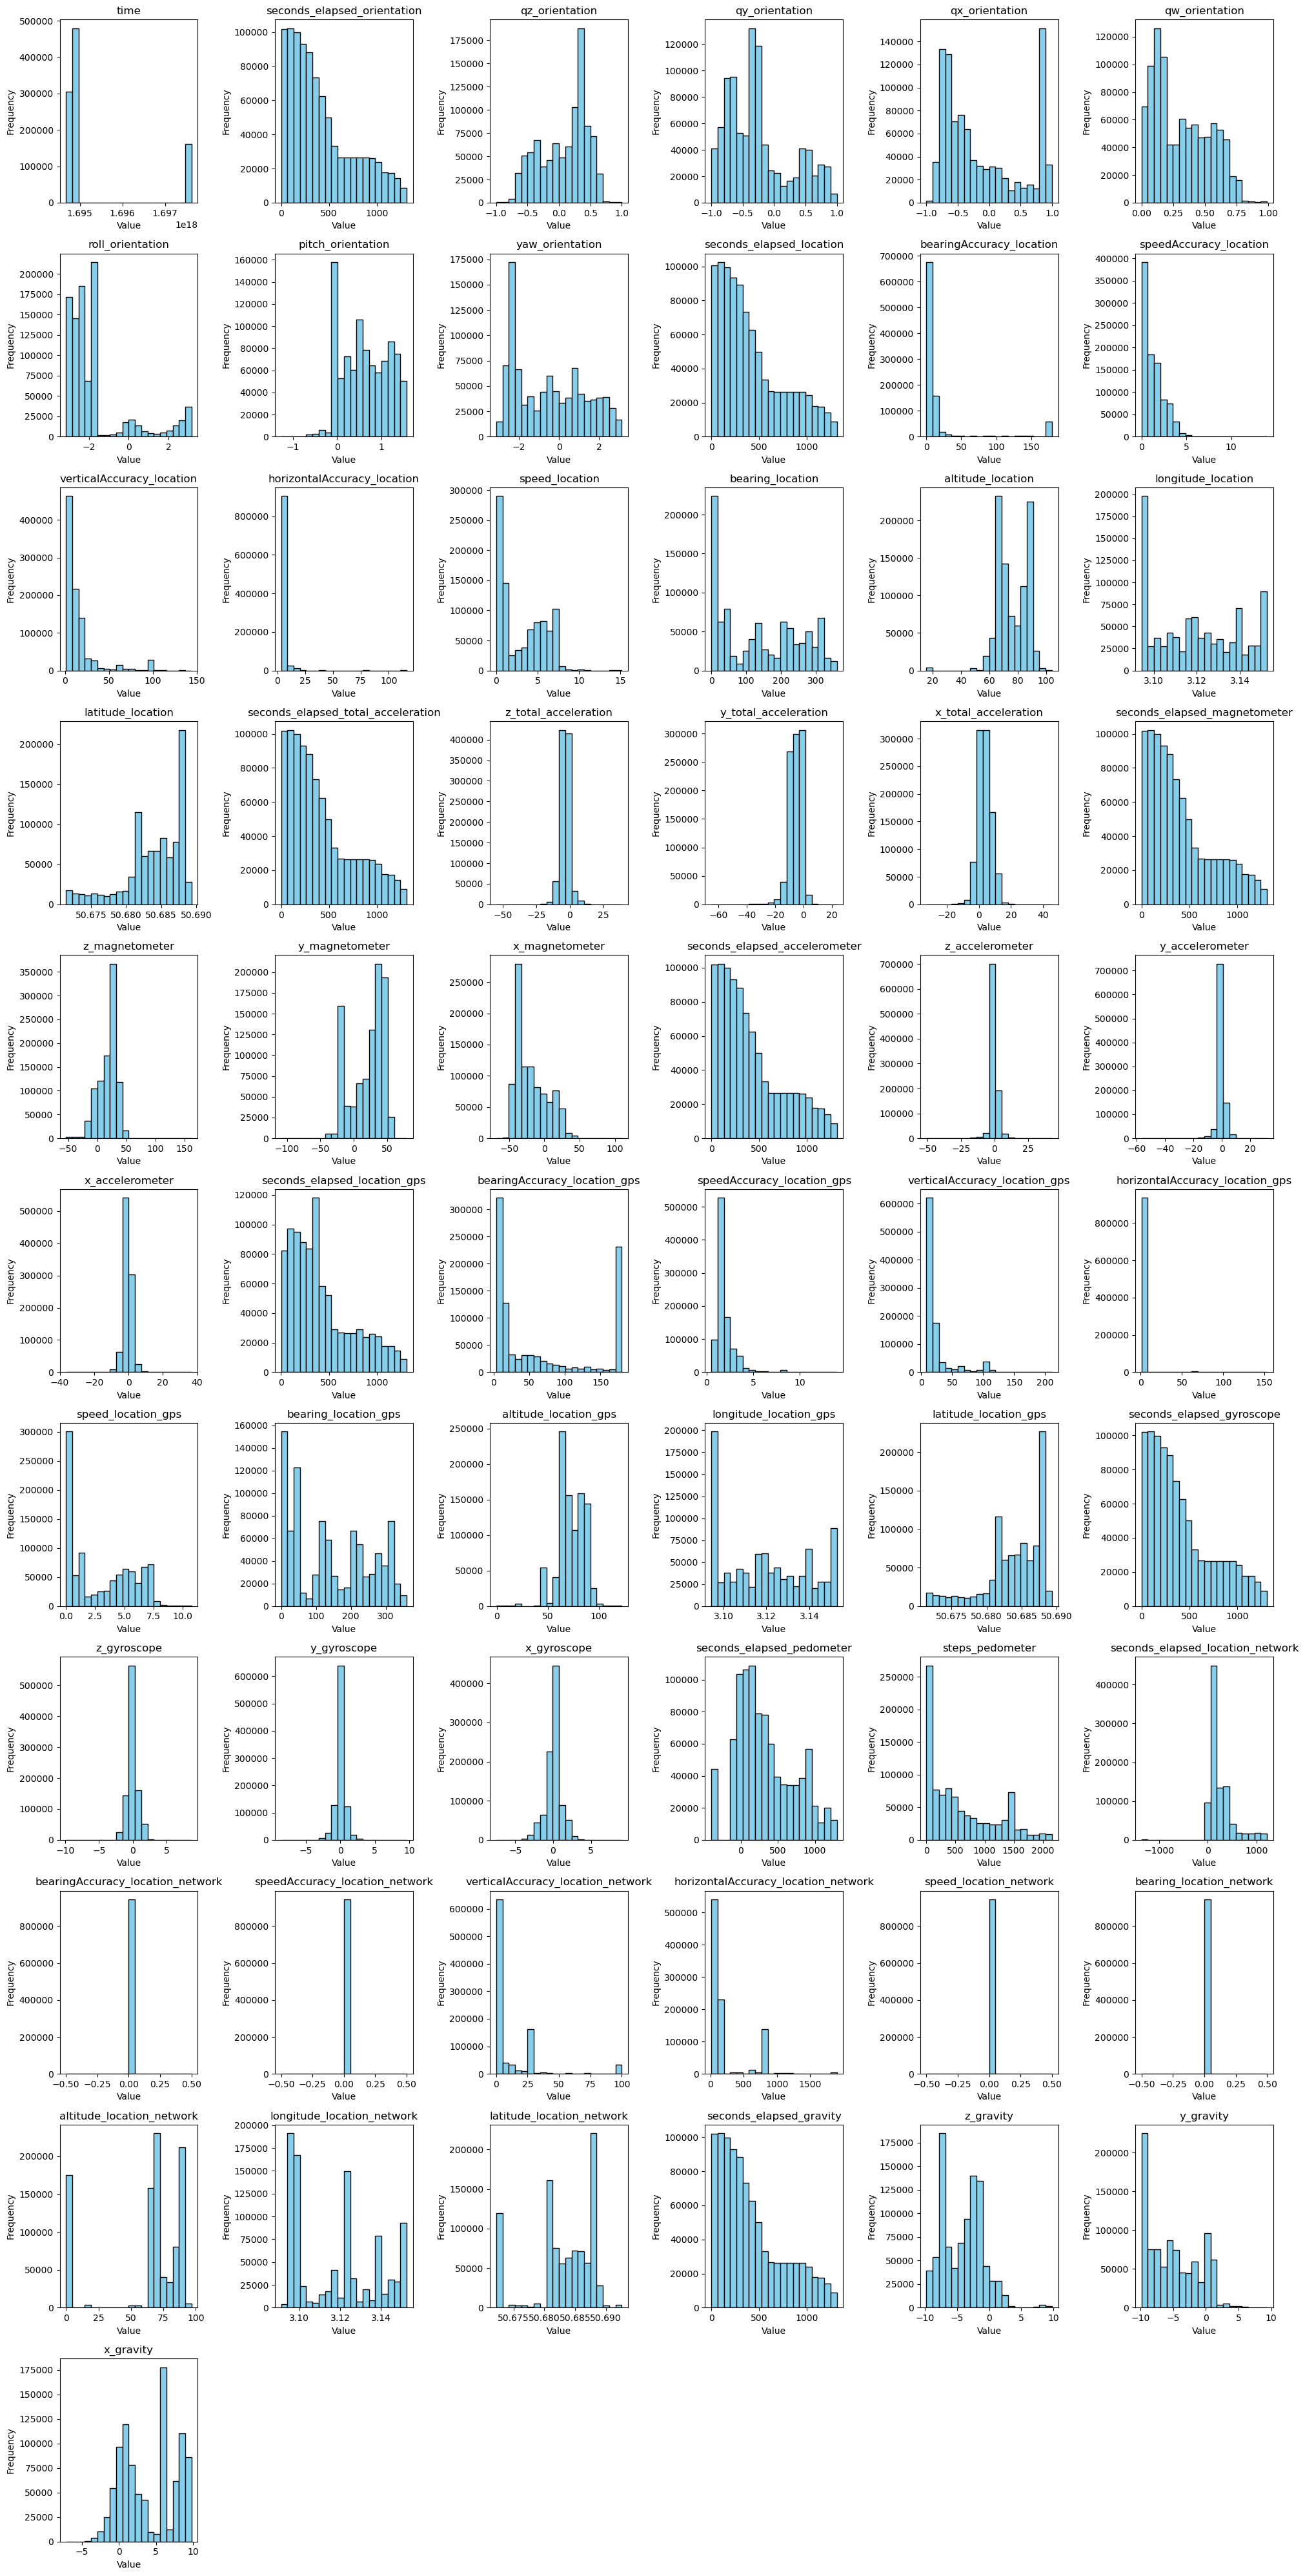

In [10]:
plt.figure(figsize=(20, 40))

for i, column in enumerate(X_train.columns, 1):
    plt.subplot(11, 6, i)
    plt.hist(X_train[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

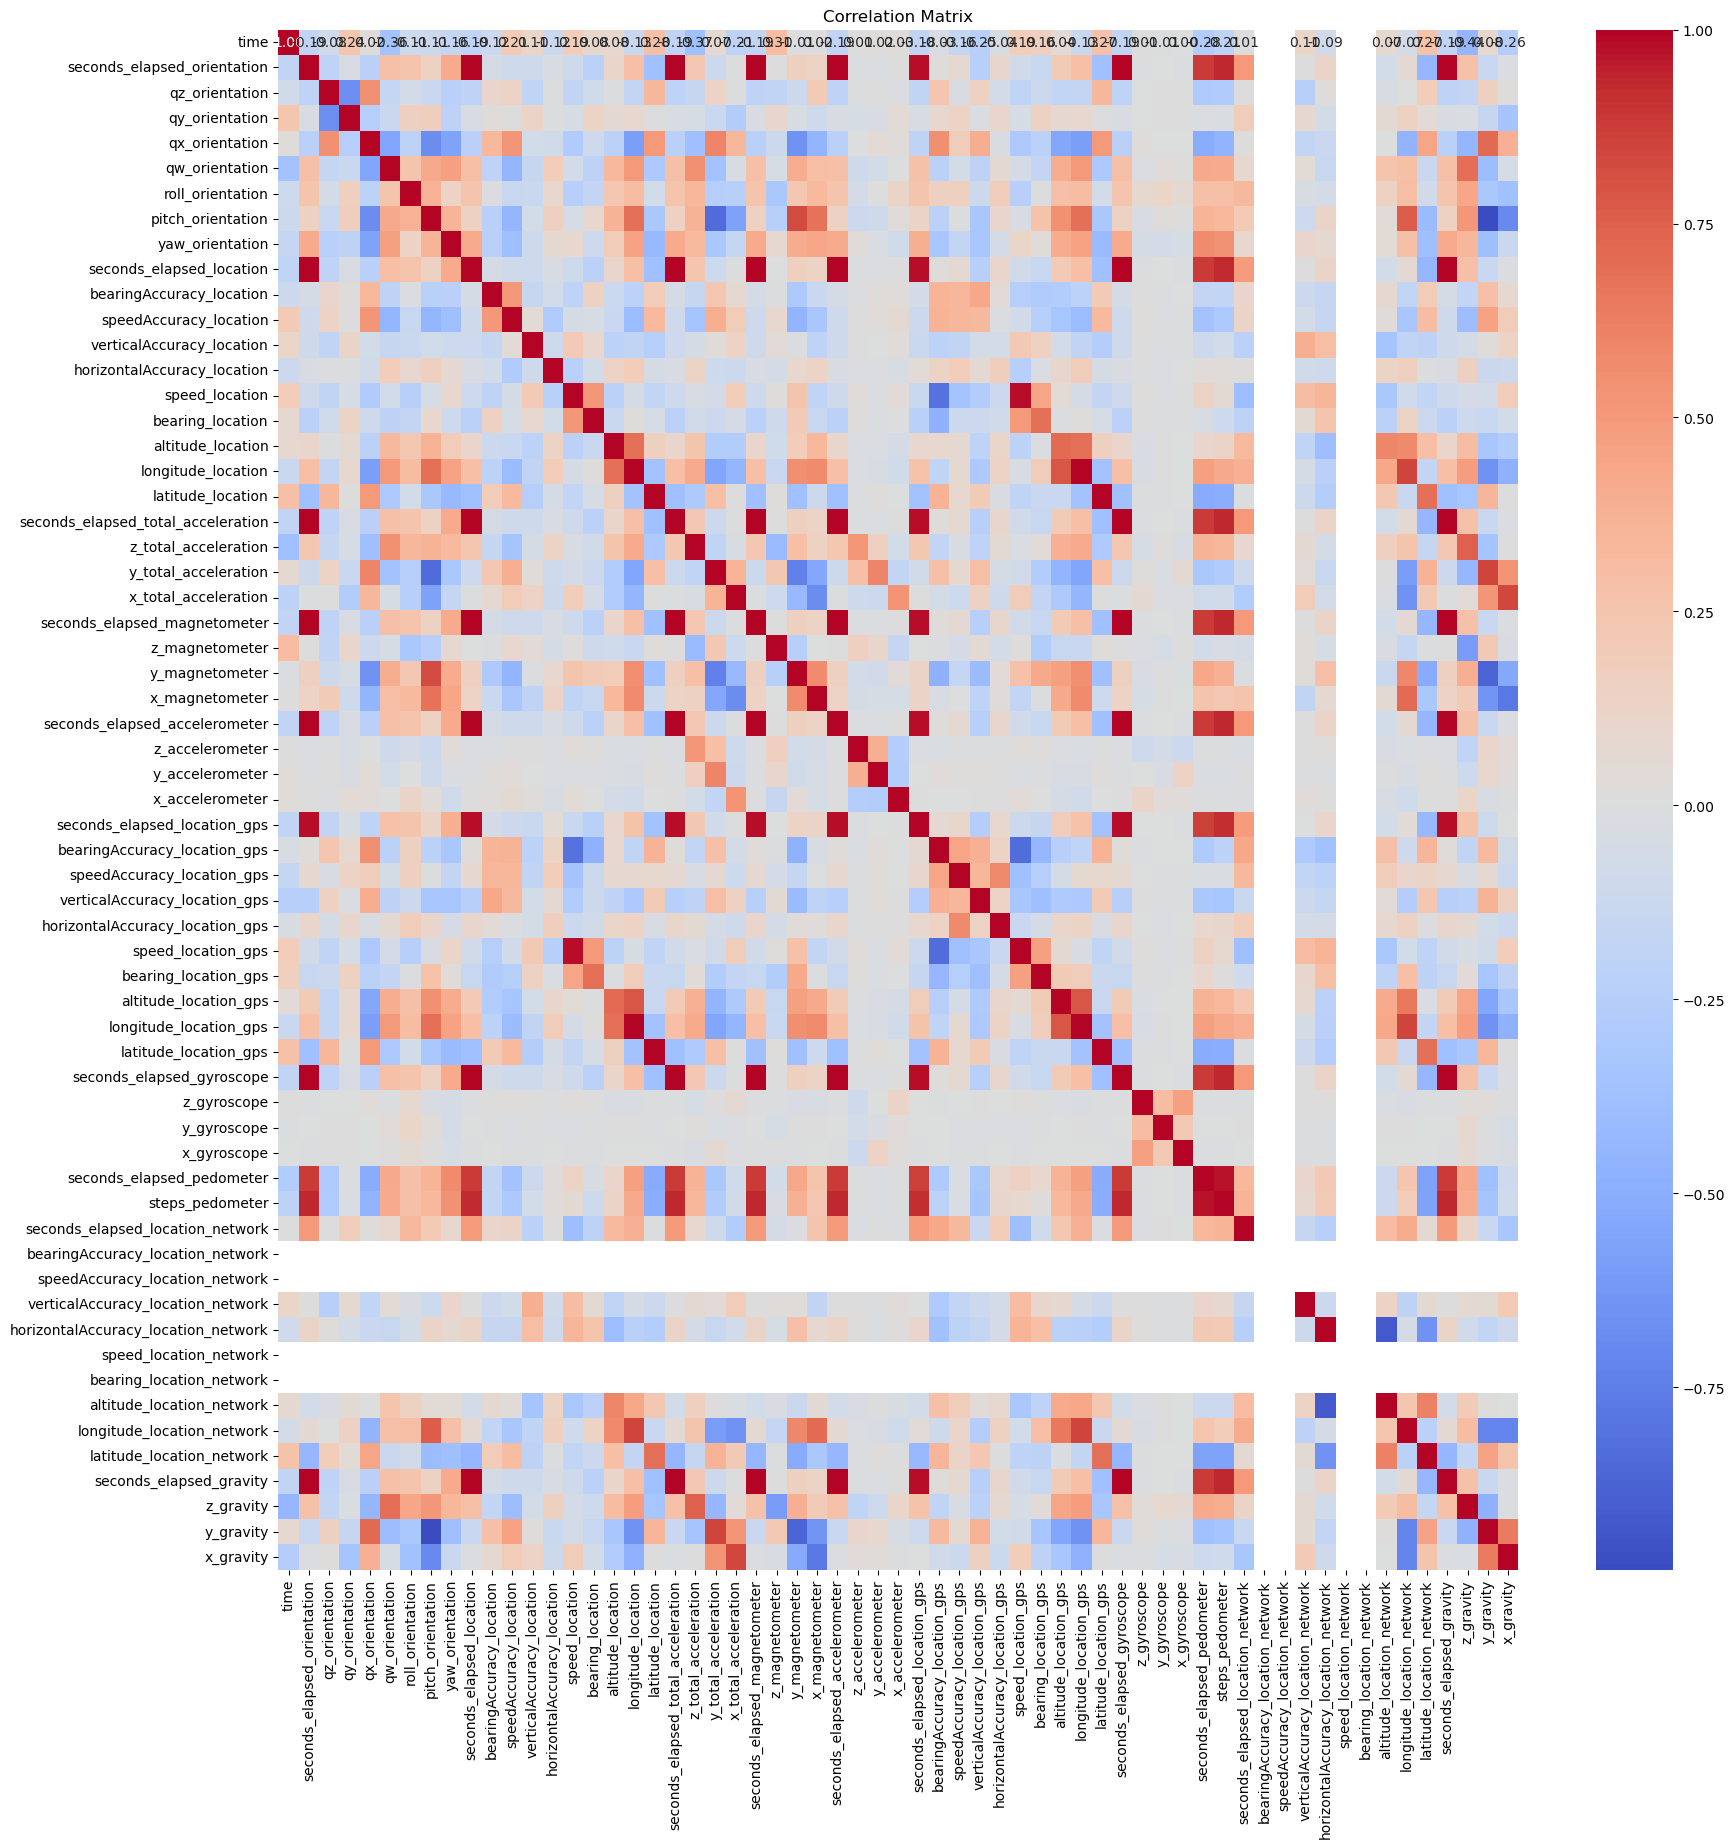

In [14]:
#correlation matrix
correlation=X_train.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Timeseries

In [22]:
time_to_date= pd.to_datetime(X_train['time'], unit='ns')
time_to_date.describe()

count                           945041
mean     2023-09-21 06:41:17.286051328
min      2023-09-14 06:22:31.570763500
25%      2023-09-14 09:16:32.031794944
50%      2023-09-16 09:28:52.775618048
75%      2023-09-16 18:25:47.027422720
max      2023-10-18 09:15:27.082729700
Name: time, dtype: object

In [25]:
decomposed_data = {}

for column in X_train.columns:
    decomposition = seasonal_decompose(X_train[column], model='additive', period=1)
    decomposed_data[column] = decomposition

In [30]:
plt.rcParams['agg.path.chunksize'] = 200
for column in decomposed_data.keys():
    plt.figure(figsize=(12, 10))

    plt.subplot(4, 1, 1)
    decomposed_data[column].trend.plot()
    plt.title(f'Trend Component - {column}')
    plt.xlabel('Time')
    plt.ylabel('Trend Component')

    plt.subplot(4, 1, 2)
    decomposed_data[column].observed.plot()
    plt.title(f'Observed Data - {column}')
    plt.xlabel('Time')
    plt.ylabel('Observed Data')

    plt.tight_layout()
    plt.show()


"plt.rcParams['agg.path.chunksize'] = 200\nfor column in decomposed_data.keys():\n    plt.figure(figsize=(12, 10))\n\n    plt.subplot(4, 1, 1)\n    decomposed_data[column].trend.plot()\n    plt.title(f'Trend Component - {column}')\n    plt.xlabel('Time')\n    plt.ylabel('Trend Component')\n\n    plt.subplot(4, 1, 2)\n    decomposed_data[column].observed.plot()\n    plt.title(f'Observed Data - {column}')\n    plt.xlabel('Time')\n    plt.ylabel('Observed Data')\n\n    plt.tight_layout()\n    plt.show()"

## Geovisualization

In [7]:

m = folium.Map(location=[X_train['latitude_location'].mean(), X_train['longitude_location'].mean()], zoom_start=10) 

northmost_point = X_train.loc[X_train['latitude_location'].idxmax(), ['latitude_location', 'longitude_location']]
southmost_point = X_train.loc[X_train['latitude_location'].idxmin(), ['latitude_location', 'longitude_location']]
eastmost_point = X_train.loc[X_train['longitude_location'].idxmax(), ['latitude_location', 'longitude_location']]
westmost_point = X_train.loc[X_train['longitude_location'].idxmin(), ['latitude_location', 'longitude_location']]

#50 random data points
for _ in range(50):
    random_record = X_train.sample()
    longitude = random_record['longitude_location'].values[0]
    latitude = random_record['latitude_location'].values[0]

    folium.Marker([latitude, longitude], tooltip='Random Location').add_to(m)

folium.Marker([northmost_point['latitude_location'], northmost_point['longitude_location']], tooltip='Northmost Point', icon=folium.Icon(color='red')).add_to(m)
folium.Marker([southmost_point['latitude_location'], southmost_point['longitude_location']], tooltip='Southmost Point', icon=folium.Icon(color='red')).add_to(m)
folium.Marker([eastmost_point['latitude_location'], eastmost_point['longitude_location']], tooltip='Eastmost Point', icon=folium.Icon(color='red')).add_to(m)
folium.Marker([westmost_point['latitude_location'], westmost_point['longitude_location']], tooltip='Westmost Point', icon=folium.Icon(color='red')).add_to(m)

m.save("map.html")
m


## PCA